In [1]:
from typing import Optional, Callable, Tuple, List, NoReturn
from functools import partial

import matplotlib.pyplot as plt
import matplotlib.image as img

import numpy as np
import cv2 as cv
import PIL as pil

In [2]:
# User-defined functions, utils module found in the same directory as Erosion.ipynb
from utils import binarise, side_by_side

In [21]:
def opening(src: np.ndarray, kernel: np.ndarray, iterations: int = 1) -> np.ndarray:
    """
        As defined in pages 644 and 645 :
            'The opening A by B is the erosion of A by B, followed by a dilation of the result by B'
        
        This function is should be equivalent to :
            cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
    """
    return cv.dilate(cv.erode(src, kernel, iterations=iterations), kernel, iterations=iterations)
##

def closing(src: np.ndarray, kernel: np.ndarray, iterations: int = 1) -> np.ndarray:
    """
        As defined in pages 644 and 6 45 :
            'The closing of A by B is simply the dilation of A by B, followed by erosion of the result by B.'
        
        This function is should be equivalent to :
            cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
    """
    return cv.erode(cv.dilate(src, kernel, iterations=iterations), kernel, iterations=iterations)
##

In [4]:
x = img.imread('imagenes/Im1T4.png')

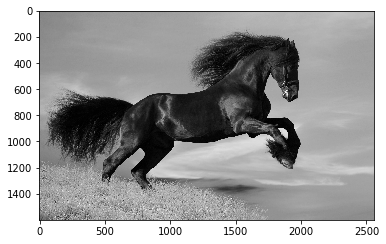

In [5]:
plt.imshow(x, cmap='gray')

In [6]:
x = 1 - x

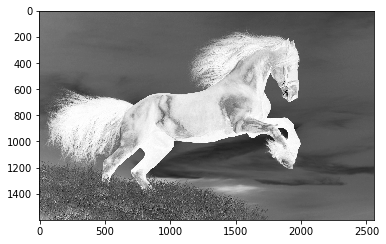

In [7]:
plt.imshow(x, cmap='gray')

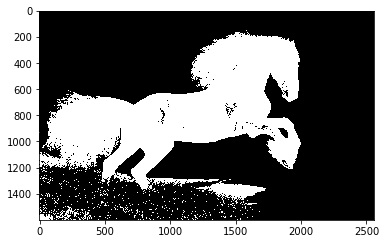

In [8]:
binaria = binarise(x)
plt.imshow(binaria, cmap='gray')

In [9]:
help(opening)

Help on function opening in module __main__:

opening(src: numpy.ndarray, kernel: numpy.ndarray, iterations: int = 1) -> numpy.ndarray
    As defined in pages 644 and 645 :
        'The opening A by B is the erosion of A by B, followed by a dilation of the result by B'
    
    This function is should be equivalent to :
        cv.morphologyEx(img, cv.MORPH_OPEN, kernel)



# Opening

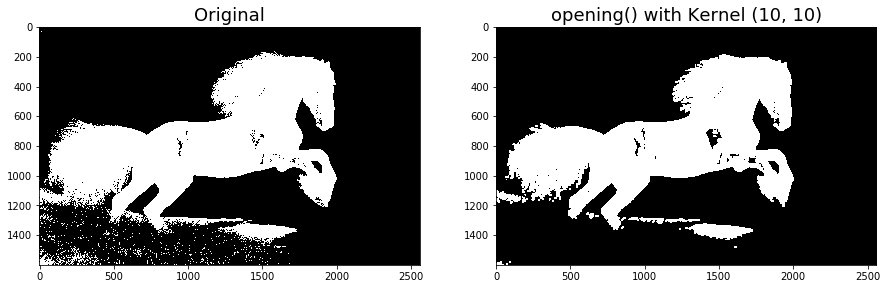

In [14]:
kernel = np.ones((10, 10))
side_by_side(binaria, opening(binaria, kernel), title1='Original', title2=f'opening() with Kernel {kernel.shape}')

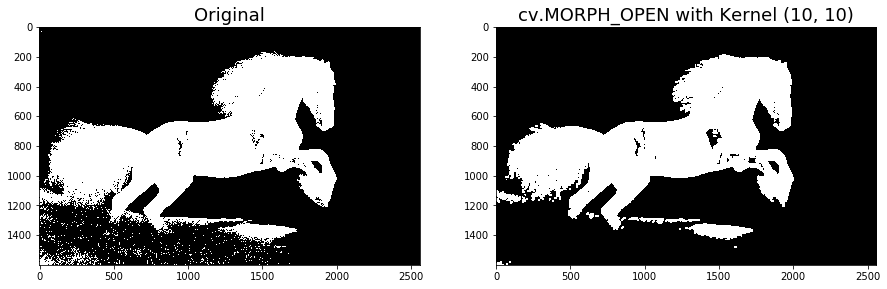

In [15]:
kernel = np.ones((10, 10))
side_by_side(binaria, cv.morphologyEx(binaria, cv.MORPH_OPEN, kernel), title1='Original', title2=f'cv.MORPH_OPEN with Kernel {kernel.shape}')

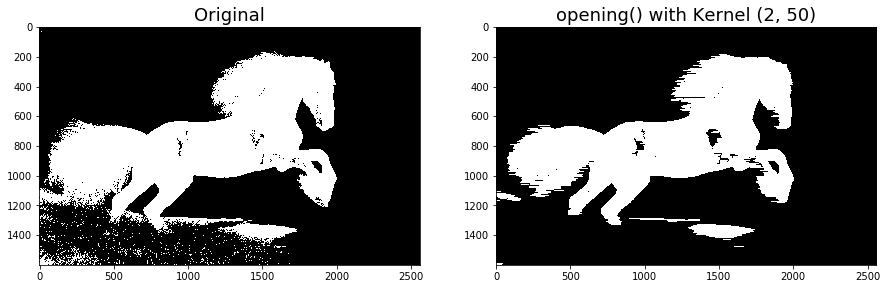

In [17]:
kernel = np.ones((2, 50))
side_by_side(binaria, opening(binaria, kernel), title1='Original', title2=f'opening() with Kernel {kernel.shape}')

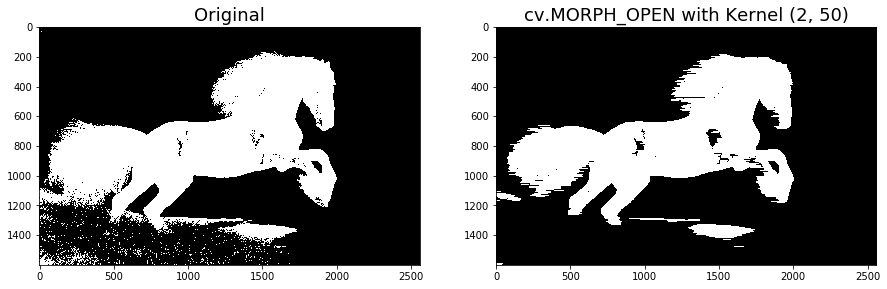

In [18]:
kernel = np.ones((2, 50))
side_by_side(binaria, cv.morphologyEx(binaria, cv.MORPH_OPEN, kernel), title1='Original', title2=f'cv.MORPH_OPEN with Kernel {kernel.shape}')

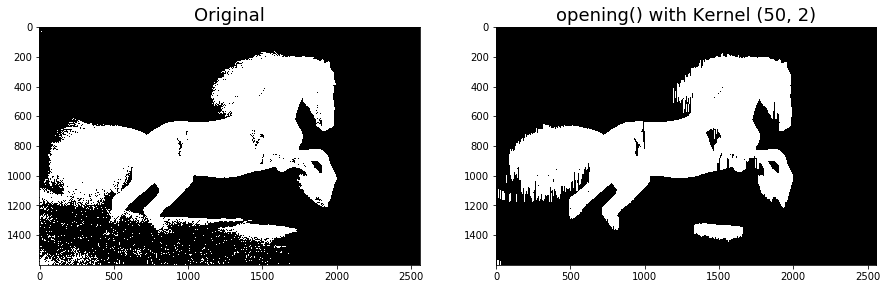

In [19]:
kernel = np.ones((50, 2))
side_by_side(binaria, opening(binaria, kernel), title1='Original', title2=f'opening() with Kernel {kernel.shape}')

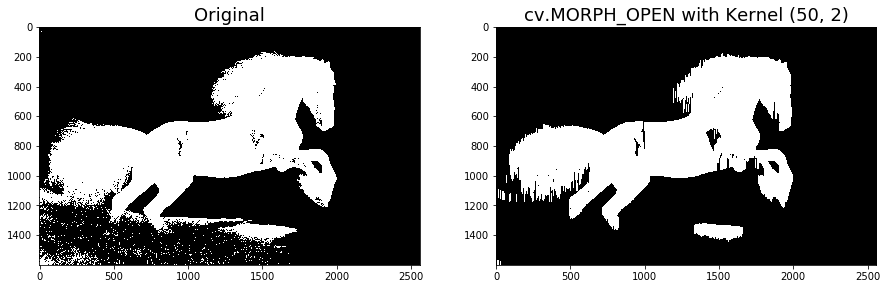

In [20]:
kernel = np.ones((50, 2))
side_by_side(binaria, cv.morphologyEx(binaria, cv.MORPH_OPEN, kernel), title1='Original', title2=f'cv.MORPH_OPEN with Kernel {kernel.shape}')

As Gonzalez explained in the book, an opening is nothing but an erosion followed by a dilation.
Our custom function ```opening(image, kernel)``` yields the same result as executing ```cv.morphologyEx(image, cv.MORPH_OPEN, kernel)```

# Closing

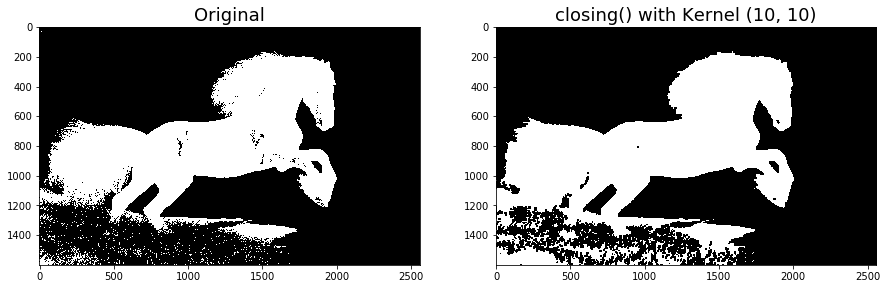

In [22]:
kernel = np.ones((10, 10))
side_by_side(binaria, closing(binaria, kernel), title1='Original', title2=f'closing() with Kernel {kernel.shape}')

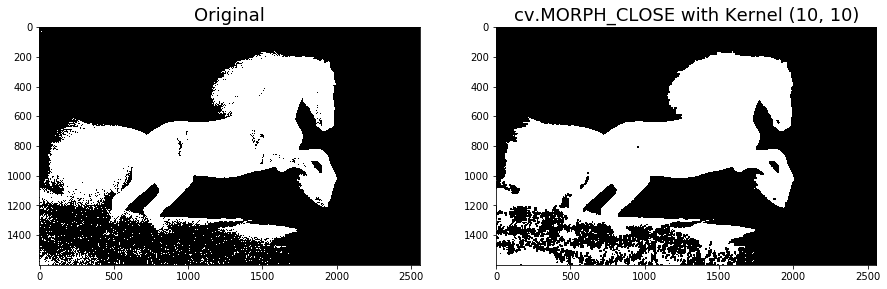

In [23]:
kernel = np.ones((10, 10))
side_by_side(binaria, cv.morphologyEx(binaria, cv.MORPH_CLOSE, kernel), title1='Original', title2=f'cv.MORPH_CLOSE with Kernel {kernel.shape}')

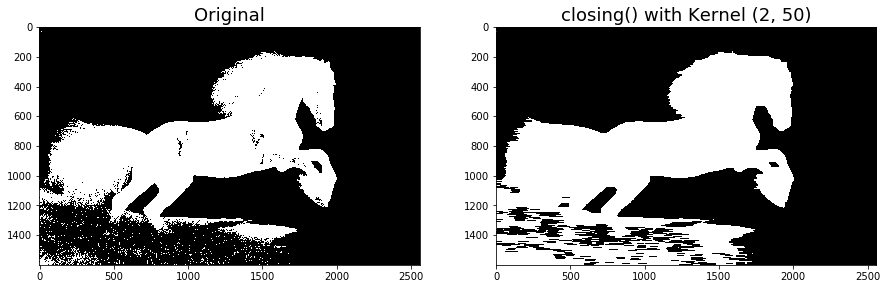

In [24]:
kernel = np.ones((2, 50))
side_by_side(binaria, closing(binaria, kernel), title1='Original', title2=f'closing() with Kernel {kernel.shape}')

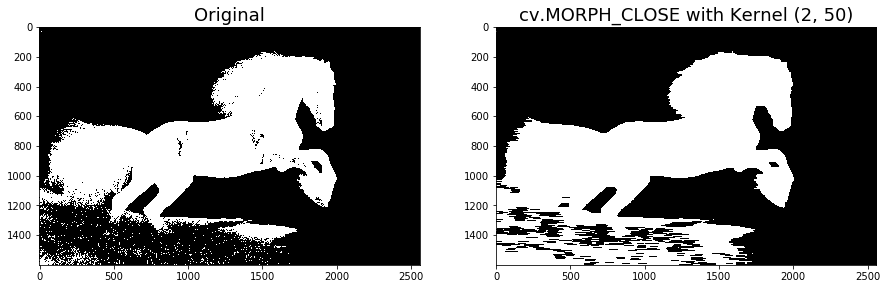

In [25]:
kernel = np.ones((2, 50))
side_by_side(binaria, cv.morphologyEx(binaria, cv.MORPH_CLOSE, kernel), title1='Original', title2=f'cv.MORPH_CLOSE with Kernel {kernel.shape}')

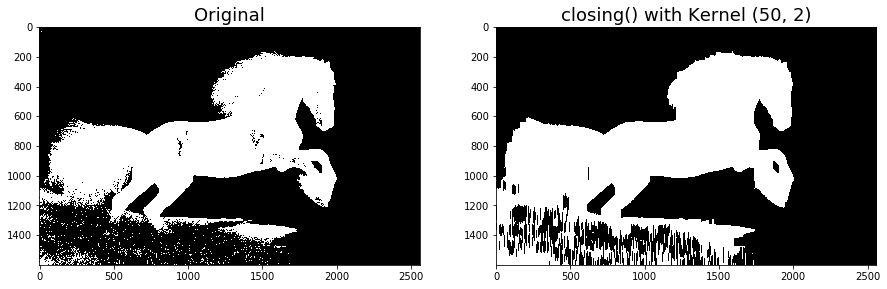

In [26]:
kernel = np.ones((50, 2))
side_by_side(binaria, closing(binaria, kernel), title1='Original', title2=f'closing() with Kernel {kernel.shape}')

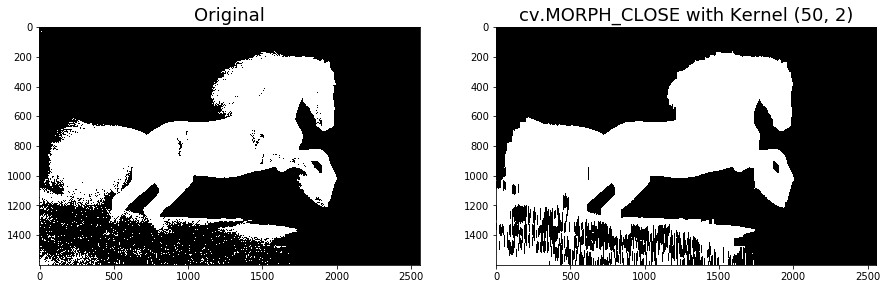

In [27]:
kernel = np.ones((50, 2))
side_by_side(binaria, cv.morphologyEx(binaria, cv.MORPH_CLOSE, kernel), title1='Original', title2=f'cv.MORPH_CLOSE with Kernel {kernel.shape}')

As Gonzalez explained on the book, the opening operation is nothing but a dilation followed by an erosion.
Our custom function ```closing(image, kernel)``` yields the same result as executing ```cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)```

# Example found on page 643

In [18]:
text = cv.imread('imagenes/text.png', 0)
text.shape

(525, 794)

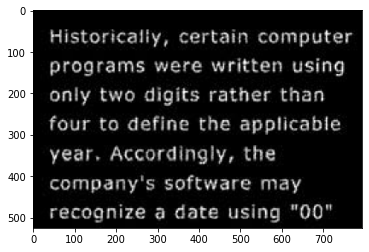

In [19]:
plt.imshow(text, cmap='gray')

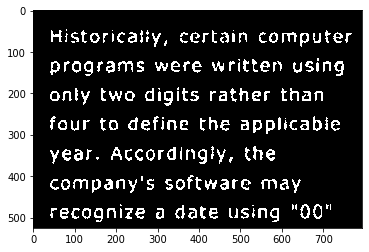

In [31]:
text2 = binarise(text, threshold=115)
plt.imshow(text2, cmap='gray')

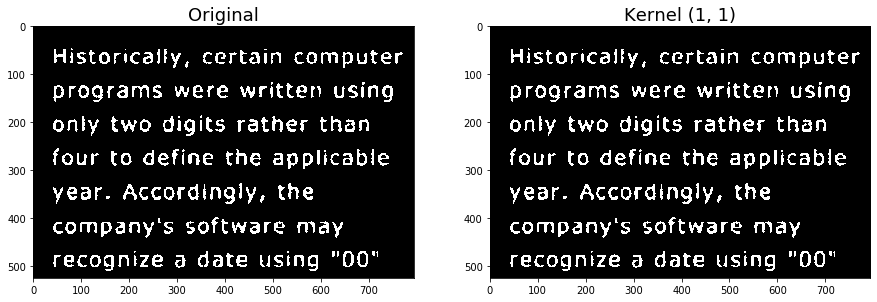

In [37]:
kernel = np.ones((1, 1))
side_by_side(text2, cv.dilate(text2, kernel), title1='Original', title2=f'Kernel {kernel.shape}')

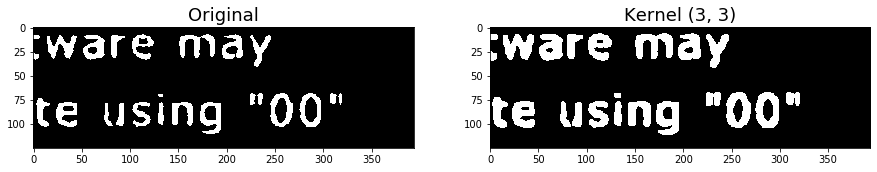

In [43]:
kernel = np.ones((3, 3))
side_by_side(text2[400:, 400:], cv.dilate(text2[400:, 400:], kernel), title1='Original', title2=f'Kernel {kernel.shape}')

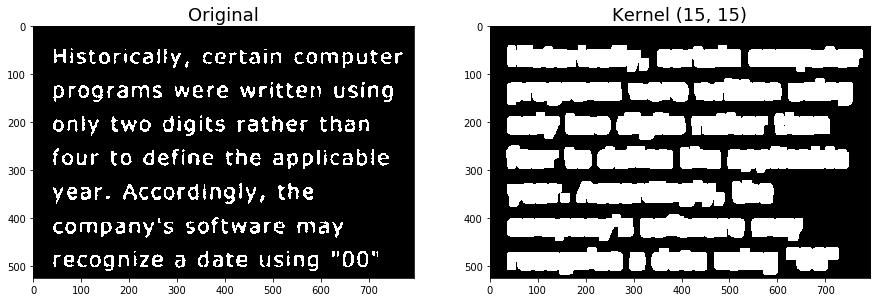

In [41]:
kernel = np.ones((15, 15))
side_by_side(text2, cv.dilate(text2, kernel), title1='Original', title2=f'Kernel {kernel.shape}')